In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pypico
import numpy as np
from math import *
import sys

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [2]:
%pwd

u'/Users/evanbiederstedt'

In [3]:
cd downloads

/Users/evanbiederstedt/Downloads


In [4]:
pico = pypico.load_pico("pico3_tailmonty_v34.dat")
outputs=['cl_TT']
inputs=pico.example_inputs()
result = pico.get(outputs, **inputs)



pypico.datafiles.3e624ff23f85df8ba6355a4e18135245:326: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [5]:
cls = result['cl_TT'][:3000]
print 'cls = ', cls
ntot = len(cls)
print 'number of cls = ', ntot

cls =  [ 1076.59705993  1078.73493561  1047.05025925 ...,    28.28413366
    28.23538124    28.18652116]
number of cls =  3000


In [6]:
type(cls)

numpy.ndarray

In [7]:
len(cls)

3000

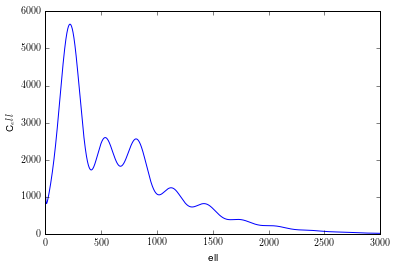

In [8]:
import matplotlib.pyplot as plt
plt.plot(cls)
plt.xlabel("ell")
plt.ylabel("C_ell")

[]

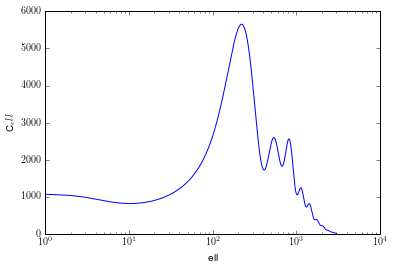

In [9]:
plt.plot(cls)
plt.xlabel("ell")
plt.ylabel("C_ell")
plt.semilogx()

In [10]:
def legpols(n, t):
    pols = np.zeros(n+1)
    pols[0] = 1.0
    pols[1] = t
    for i in range(1,n):
        pols[i+1] = ((i*2.0+1)*t*pols[i] - i*pols[i-1])/(i+1.0)        
    return pols

In [11]:
n = 2000
alphas = np.exp(np.linspace(np.log(pi/18000), np.log(pi), num=n, endpoint=False))
print 'alphas = ', alphas

alphas =  [  1.74532925e-04   1.75390071e-04   1.76251426e-04 ...,   3.09575772e+00
   3.11096124e+00   3.12623943e+00]


In [12]:
val = np.zeros(n)

In [13]:
ell = np.arange(len(cls))

In [14]:
print ell

[   0    1    2 ..., 2997 2998 2999]


In [20]:
unnorm = (2*pi)/(ell*(ell+1))

unnorm[1:]

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


array([  3.14159265e+00,   1.04719755e+00,   5.23598776e-01, ...,
         6.99296729e-07,   6.98830376e-07,   6.98364489e-07])

In [21]:
Cell = unnorm*cls

In [22]:
for i in range(n):
    t = cos(alphas[i])
    pols = legpols(ntot+10, t)
    val[i] = 0
    for j in range(ntot):
        val[i] = val[i] + (2.0*j+1)*Cell[j]*pols[j]


In [23]:
plt.plot(alphas, val, 'k-', linewidth=.75 ,alpha=1.)
plt.plot(alphas, -val, 'r-', linewidth=.75 ,alpha=1.)
plt.loglog()
plt.xlabel(r"$\alpha$")
plt.ylabel("covariance")

ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.